In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..\..'))
import lazyfit

In [2]:
sys.path

['C:\\Dropbox\\Programming\\Python\\lazyfit\\Test Notebooks',
 'C:\\Dropbox\\Programming\\Python\\lazyfit\\Test Notebooks\\..\\..',
 'C:\\Program Files\\Swabian Instruments\\Time Tagger\\driver\\python',
 'C:\\ProgramData\\Anaconda3\\python38.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\marti\\.ipython']

In [3]:
importlib.reload(lazyfit)
importlib.reload(lazyfit.models)

<module 'lazyfit.models' from 'C:\\Dropbox\\Programming\\Python\\lazyfit\\Test Notebooks\\..\\..\\lazyfit\\models.py'>

# Test 1, lorentzian

In [4]:
amp = 200
bg = 100
FWHM = 2
x0 = 1

x = np.linspace(-10,10,50)
y = amp/(1+(x-x0)**2/(FWHM/2)**2) + bg
y_noise = np.random.poisson(lam=y)

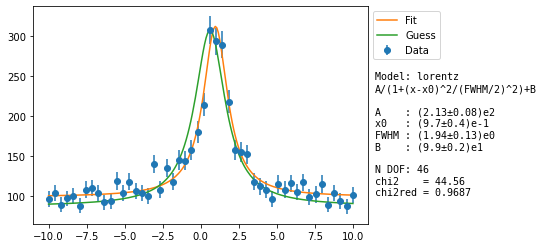

In [5]:
fit_lorentz = lazyfit.fit('lorentz', x, y_noise, dy=np.sqrt(y_noise))
fit_lorentz.plot(N=200, plot_guess = True, plot_residuals=False, use_log=False);

In [6]:
fit_lorentz.params

array([213.1389757 ,   0.96802594,   1.9446305 ,  98.7045102 ])

In [7]:
fit_lorentz.errors

array([8.34033698, 0.03797675, 0.12615126, 2.20168635])

# Test 2, exp decay

In [8]:
amp = 2000
bg = 10
Gamma = 1

x = np.linspace(0,10,500)
y = amp*np.exp(-x*Gamma) + bg
y_noise = np.random.poisson(lam=y)

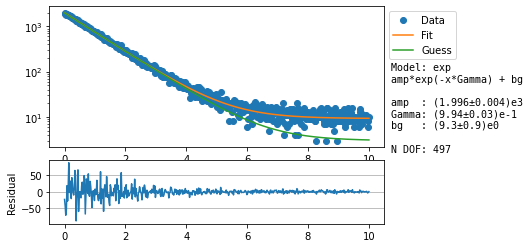

In [9]:
fit_exp = lazyfit.fit('exp',x,y_noise)
fig = fit_exp.plot(plot_guess = True, use_log = True, plot_residuals=True)

In [10]:
fit_exp.bounds is None

False

# Test 3, sine

In [11]:
amp = 0.5
bg = np.random.uniform(-3, 3)
f = np.random.uniform(2, 4)
phi = np.random.uniform(0, 2*np.pi)

x = np.linspace(0,2,100)
y = lazyfit.models.sin.f(x, amp, f, phi, bg)
y_noise = y + np.random.normal(scale=0.1, size=x.size)

In [12]:
phi

3.421810217067936

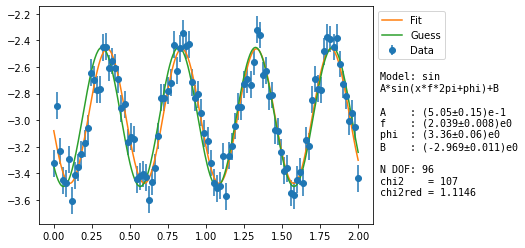

In [13]:
fit_sin = lazyfit.fit('sin',x,y_noise, dy=0.1)
fig = fit_sin.plot(N=400, plot_guess=True)

In [14]:
fit_sin.guess

[0.5219999081443767, 1.98, 3.9269908169872414, -2.9752621998983564]

In [15]:
lazyfit.utility.get_main_fourier_component(x, y)

(1.98, 2.2120126887659235)

In [16]:
4.9/np.pi

1.5597184423005745

In [17]:
from scipy.fft import fft, fftfreq

In [18]:
N = len(x)
yf = fft(y)
dt = x[1]-x[0]  # time step size, assume equal
xf = fftfreq(N, dt)#[:N//2] # construct xaxis

max_ind = np.argmax(np.abs(yf))
max_freq = xf[max_ind]
max_phase = np.angle(yf[max_ind]) % (2*np.pi)  # fold into range 0..2pi to conform with fit limits

(0.0, 4.4)

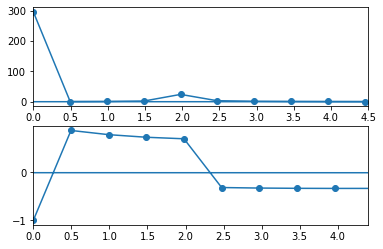

In [19]:
plt.subplot(2,1,1)
plt.plot(xf, np.abs(yf), '-o')
plt.xlim(0, 4.5)
plt.subplot(2,1,2)
plt.plot(xf, np.angle(yf)/np.pi, '-o')
plt.xlim(0, 4.4)

# Test fixing

In [20]:
amp = 2000
bg = 100
FWHM = 2
x0 = 1

x = np.linspace(-10,10,50)
y = amp/(1+(x-x0)**2/(FWHM/2)**2) + bg
y_noise = np.random.poisson(lam=y)

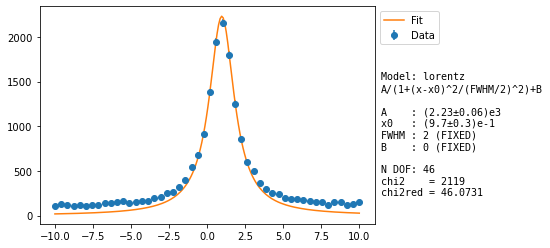

In [21]:
fit_lorentz = lazyfit.fit('lorentz', x, y_noise, dy=np.sqrt(y_noise), fix={'B':0, 'FWHM':2})
fit_lorentz.plot(N=200, plot_guess = False, plot_residuals=False, use_log=False);

In [22]:
importlib.reload(lazyfit)

<module 'lazyfit' from 'C:\\Dropbox\\Programming\\Python\\lazyfit\\Test Notebooks\\..\\..\\lazyfit\\__init__.py'>

In [23]:
fit_lorentz.params

array([2.23071268e+03, 9.65523327e-01, 2.00000200e+00, 0.00000000e+00])

In [24]:
fit_lorentz.params_dict

{'A': 2230.7126805498474,
 'x0': 0.9655233268992505,
 'FWHM': 2.0000019999999994,
 'B': 0.0}

In [25]:
fit_lorentz.errors

array([6.26666922e+01, 2.80909260e-02, 7.95643885e-02, 0.00000000e+00])

In [26]:
fit_lorentz.errors_dict

{'A': 62.666692190334906,
 'x0': 0.028090925993393454,
 'FWHM': 0.07956438845272032,
 'B': 0.0}

# Gaussian

In [27]:
amp = 2000
bg = 100
s = 1
x0 = 1

x = np.linspace(-10,10,50)
y = lazyfit.models.gaussian.f(x, amp, x0, s, bg )
y_noise = np.random.poisson(lam=y)

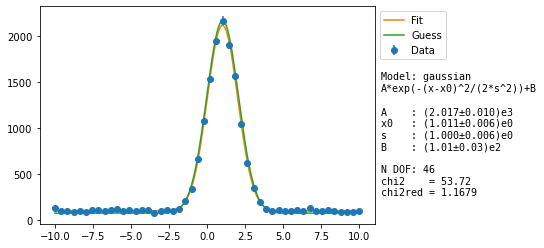

In [28]:
fit_gauss = lazyfit.fit('gaussian', x, y_noise, dy=np.sqrt(y_noise))
fit_gauss.plot(N=200, plot_guess = True, plot_residuals=False, use_log=False);

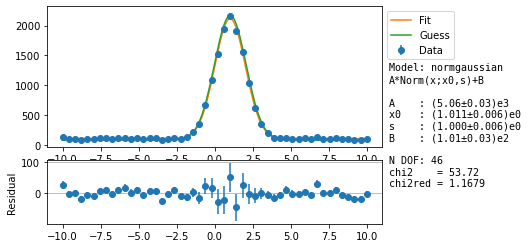

In [29]:
fit_gaussnorm = lazyfit.fit('normgaussian', x, y_noise, dy=np.sqrt(y_noise))
fit_gaussnorm.plot(N=200, plot_guess = True, plot_residuals=True, use_log=False);

In [30]:
fit_gaussnorm.verbose

False

### Voigt

In [31]:
amp = 1000
bg = 0
L = 1
G = 0
x0 = 0

x = np.linspace(-5,5,100)
y = lazyfit.models.voigt.f(x, amp, x0, L, G, bg )
y_noise = np.random.poisson(lam=y)

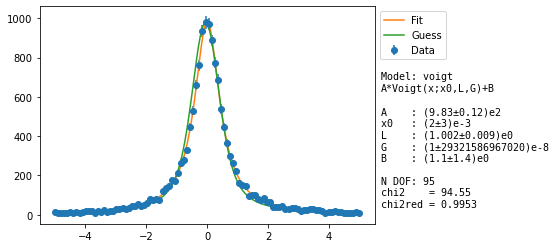

In [32]:
fit_voigt = lazyfit.fit('voigt', x, y_noise, dy=np.sqrt(y_noise))
fit_voigt.plot(N=200, plot_guess = True, plot_residuals=False, use_log=False);

In [33]:
lazyfit.utility.get_voigt_FWHM(fit_voigt.params_dict['G'], fit_voigt.params_dict['L'] )

1.0015951782406667

### Linear

In [34]:
a = 5
b = 1
x = np.linspace(-2,5,20)
y = lazyfit.models.lin.f(x, a, b)
y_noise = y + np.random.normal(scale = 1, size=y.size)

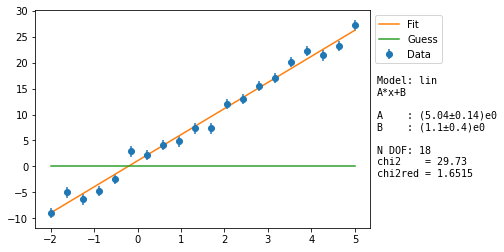

In [35]:
fit_lin = lazyfit.fit('lin', x, y_noise, dy=1)
fit_lin.plot(N=200, plot_guess = True, plot_residuals=False, use_log=False);

### Rabi

In [49]:
A = 1000
B = 100
x_pi = 0.5e-7

x = np.linspace(0, 2e-7, 30)
y = lazyfit.models.rabi.f(x, A, x_pi, B)
y_noise = np.random.poisson(lam=y)

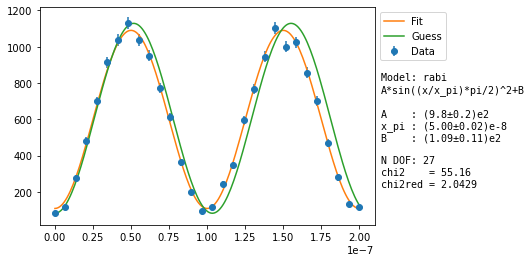

In [50]:
fit_rabi = lazyfit.fit('rabi', x, y_noise, dy=np.sqrt(y_noise))
fit_rabi.plot(N=200, plot_guess = True, plot_residuals=False, use_log=False);

In [38]:
0.5/lazyfit.utility.get_main_fourier_component(x, y_noise)[0]

5.172413793103448e-08